## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [1]:
# I'm leaving this code in comments; it's doing the above in numpy. It's not valid, since we want to see python's arbitrary integer store limit. It's
# useful to leave the numpy code here to show how numpy handles incredibly big integer vlues and floats. Spoiler: floats the same as python, but just 
#says 0 for integer values and not smth like inf or a super big number.


#import numpy as np
#def nmpy_factorial(number, if_float = False):
#    if if_float:
#        numbers= np.array(1.0)
#        for i in range(1,number):
#            numbers = np.append(numbers,float(i+1)) #There's probably a better way to cast i+1 as a float, but I think this works
#        return np.prod(numbers)
#        
#    
#    else:
#        numbers = np.array(1) #Array that's just one
#        for i in range (1,number): 
#            numbers = np.append(numbers,i+1) # Append the next number until you reach the end number
#        return np.prod(numbers)
#
#factorial(200,True)

def factorial(number,if_float = False):
    if if_float:
        product = 1.0
        for i in range(1,number):
            product *= float(i+1)
        return product

    else:
        product = 1
        for i in range(1,number):
            product *= (i+1)
        return product

factorial(200)

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

Explaining what I found above: Python has arbitrary size for integers, meaning that it can store super big intergers like 200!. However, there is a "rounding error" of sorts with the tail of zeroes. Relative to the overall number, these aren't signifigant for most practical purposes, but it is saying Python has "rounded" a bit. For floats however, there is a limit to what Python can store and when that limit is reached and surpassed, Python says "this is too big for me so I'll just say it's infinity", which is why we see inf when running 200! as floats.

**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [2]:
def function(x):
    return x*(x-1)

def deriv(function,position,delta_power):
    delta = 10**(delta_power)
    return (function(position+delta) - function(position))/delta
    
deriv(function,1,-2)

1.010000000000001

Explaining why the analytic solution won't agree perfectly with my numerical solution: We're not actually taking the limit as delta goes to zero; the computer is doing one pretty decent approximation to what it should actually be. 

Explaining why that the accuracy of the calculation initially got better, but then got worse: I presume that there is some floating point error happening when delta is super small. So the calculation might be something like (4.4-4.3999999999999999999999999999999999999999)/.00000000000000000000001. With all of these decimal places, python tries but ultimately fails to be accurate (relatable). Hence, our accuracy suffers. It can handle some decimal places fine though, which is why the calculation got better initially when there were less decimal places.

### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [78]:
# This is code I wrote from numeric_integration_2 (1)
def function2(x):
    return x**4 - 2*x + 1

# For comparison to Simps later
def trapezoid_integration(function, start, end, steps):
    step_interval = (end - start) / steps # This is a float
    start_end_values = step_interval/2 *(function(start) + function(start))
    terms = []
    for i in range(1,steps-1):
        x_k = start + step_interval*i
        terms.append(function(x_k))
    term_sum = np.sum(terms) * step_interval
    return start_end_values + term_sum

def simps_int(function,start,end,steps):
    h = (end-start)/steps
    terms = []
    start_end_values = (h/3) *function(start) + (h/3)*function(end)
    for i in range(1,steps,2):
        x_k = start + h*i
        terms.append((4*h/3)*function(x_k))
    for i in range(2,steps-1,2):
        x_k = start + h*i
        terms.append((2*h/3)*function(x_k))
    return start_end_values + np.sum(terms)

def frac_error(true_value,other_value):
    return abs((true_value - other_value) / true_value)


#Making answers variables for easier lines with fractional error; doing same for traps to match style and look nicer I guess
simps10 = simps_int(function2,0,2,10)
simps100 = simps_int(function2,0,2,100)
simps1000 = simps_int(function2,0,2,1000)


traps10 = trapezoid_integration(function2,0,2,10)
traps100 = trapezoid_integration(function2,0,2,100)
traps1000 = trapezoid_integration(function2,0,2,1000)


print("Simps Rule; 10 Steps: " + str(simps10) + " with fractional error " + str(frac_error(4.4,simps10)))
print("Simps Rule; 100 Steps: " + str(simps100)  + " with fractional error " + str(frac_error(4.4,simps100)))
print("Simps Rule; 1000 Steps: " + str(simps1000) + " with fractional error " + str(frac_error(4.4,simps1000)))

print("Traps Rule; 10 Steps: " + str(traps10)  + " with fractional error " + str(frac_error(4.4,traps10)))
print("Traps Rule; 100 Steps: " + str(traps100)  + " with fractional error " + str(frac_error(4.4,traps100)))
print("Traps Rule; 1000 Steps: " + str(traps1000)  + " with fractional error " + str(frac_error(4.4,traps1000)))

Simps Rule; 10 Steps: 4.400426666666667 with fractional error 9.696969696972666e-05
Simps Rule; 100 Steps: 4.400000042666668 with fractional error 9.696969893724372e-09
Simps Rule; 1000 Steps: 4.400000000004266 with fractional error 9.695274885953866e-13
Traps Rule; 10 Steps: 1.7270400000000006 with fractional error 0.607490909090909
Traps Rule; 100 Steps: 4.0328759328 with fractional error 0.08343728800000015
Traps Rule; 1000 Steps: 4.362130474793569 with fractional error 0.00860671027418885


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

[0.0, 0.0996676642944342, 0.19736503105107447, 0.2912378835270183, 0.37965284294984325, 0.4612810148684814, 0.5351535440011038, 0.6006856969956175, 0.6576698976394771, 0.706241565336301, 0.7468241838759145, 0.780061471101485, 0.8067447675600646, 0.8277429525245805, 0.8439406159510479, 0.8561882254226036, 0.8652659855491707, 0.8718612869567643, 0.8765582750426351, 0.8798372161363504, 0.8820809835944895, 0.8835860414824027, 0.8845756448385063, 0.8852134730026399, 0.8856164529263658, 0.8858660294166303, 0.8860175489849145, 0.8861077235037389, 0.8861603319457686, 0.8861904198056574]


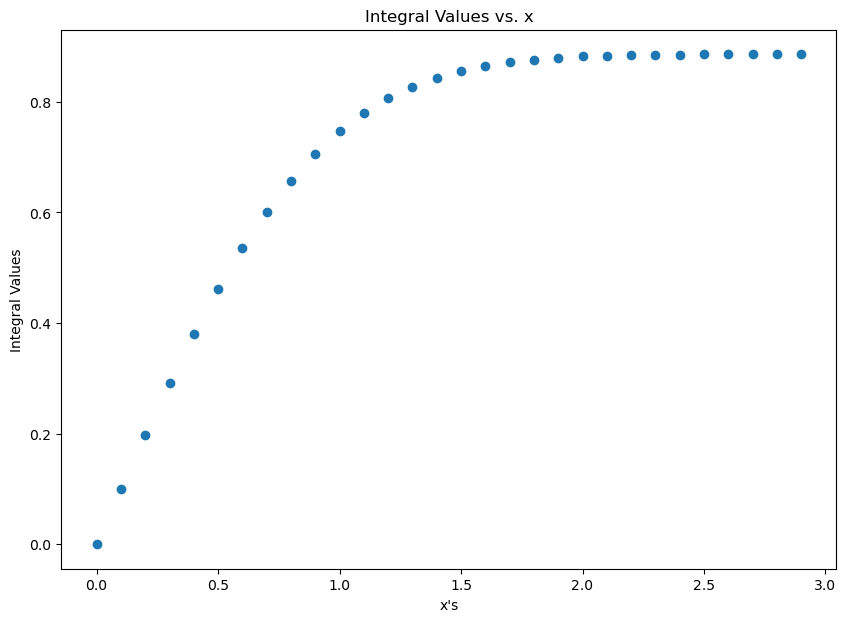

In [85]:
# Considering how much "nicer" Simps rule is, I will use that. I will also use the nifty code I wrote for the inclass work to get it to an appropriate
# precision, because I can. I'm saying to 5 decimal places, because I like the number 5.
import numpy as np
from matplotlib import pyplot as plt

def function3(x):
    return (np.e)**(-x**2)
    

def simps_int(function,start,end,steps):
    h = (end-start)/steps
    terms = []
    start_end_values = (h/3) *function(start) + (h/3)*function(end)
    for i in range(1,steps,2):
        x_k = start + h*i
        terms.append((4*h/3)*function(x_k))
    for i in range(2,steps-1,2):
        x_k = start + h*i
        terms.append((2*h/3)*function(x_k))
    return start_end_values + np.sum(terms)

def simps_error(function,start,end,precision, print_steps_and_error = False):
    precise = 10**(-1*precision)
    error = 1 # Dummy number
    i = 0

    #These are outside while to save computer some trouble.
    step1 = 10 
    simp1 = simps_int(function,start, end, step1)
    while error > precise:
        i +=1 
        if i > 1000:
            print("Too long to get to precision")
            break
            
        step2 = 2*step1
        
        simp2 = simps_int(function,start, end, step2)
        error = (simp2 - simp1)/15 #The division by 15 comes from the equation in the book
        #Redefine next first as seconds at the end to make better
        step1 = step2
        simp1 = simp2
        if print_steps_and_error:
            print(step2)
            print(error)
    
    return(simp2)

int_ans = []
x_array = []
for i in range(0,30):
    x_array.append(i/10)
    int_ans.append(simps_error(function3,0,i/10,5))

print(int_ans)

fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
plt.title("Integral Values vs. x")
plt.xlabel("x's")
plt.ylabel("Integral Values")
graph.scatter(x_array,int_ans)